In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
import datetime as dt

In [4]:
#import warnings
#warnings.filterwarnings("ignore")

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
measurement_row = session.query(Measurement).first()
measurement_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19deeb69188>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [12]:
station_row = session.query(Station).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19df3c04648>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data.

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Perform a query to retrieve the data and precipitation scores
new_df = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
# Save the query results as a Pandas DataFrame
precip_12 = pd.DataFrame(new_df)
# Replace Nan with 0
precip_12['prcp'].fillna(0, inplace=True)
# Convert date column to datetime
precip_12['date'] = pd.to_datetime(precip_12['date'])
precip_12

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,0.00
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [14]:
# Set the index to the date column
precip_12 = precip_12.set_index('date')

# Sort the dataframe by date
precip_12 = precip_12.sort_index()
precip_12

,prcp
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


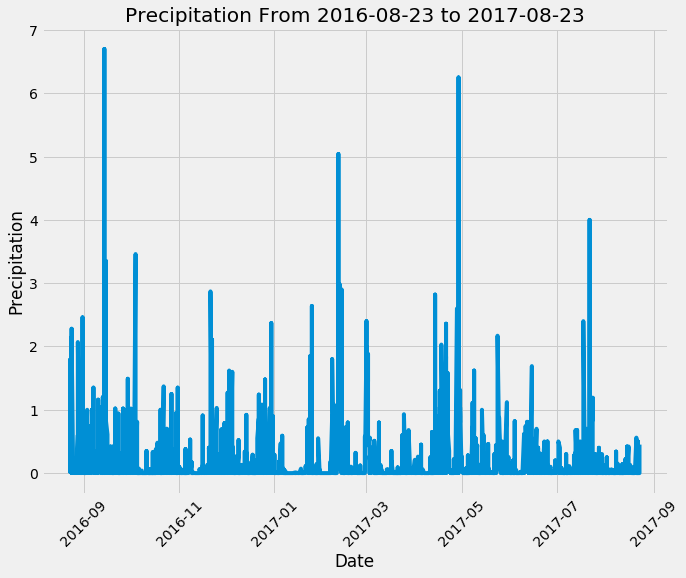

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
date_12 = precip_12.index.tolist()
prcp_12 = precip_12['prcp'].tolist()

# Create plot
plt.figure(figsize=(10,8))
plt.plot(date_12, prcp_12)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation From 2016-08-23 to 2017-08-23')
plt.savefig('output_files/precip_12_months')

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_12.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
mean_precip = np.mean(prcp_12)
print(f"The mean precipitation is {mean_precip}")

median_precip = np.median(prcp_12)
print(f"The median precipitation is {median_precip}")

mode_precip = sts.mode(prcp_12)
print(f"The mode precipitation is {mode_precip}")

The mean precipitation is 0.16066367713004487
The median precipitation is 0.01
The mode precipitation is ModeResult(mode=array([0.]), count=array([1083]))


![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [39]:
# Design a query to find the most active stations.
activity = session.query(Measurement.station, Measurement.tobs).all()
active_stations = pd.DataFrame(activity)
active_stations.groupby('station').count()

# Save the query results as a Pandas DataFrame
#precip_12 = pd.DataFrame(new_df)
# List the stations and observation counts in descending order.
# most_active = session.query(*activity).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
# Which station has the highest number of observations?
# active_one = session.query(*most_active).group_by(Measurement.station).func.max(Measurement.id).all()
# print(active_one)

,tobs
station,
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


In [24]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
new_df2 = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23').all()
# Save the query results as a Pandas DataFrame
tobs_12 = pd.DataFrame(new_df2)
tobs_12

,station,date,tobs
0,USC00519397,2016-08-23,81.0
1,USC00519397,2016-08-24,79.0
2,USC00519397,2016-08-25,80.0
3,USC00519397,2016-08-26,79.0
4,USC00519397,2016-08-27,77.0
...,...,...,...
2225,USC00516128,2017-08-19,71.0
2226,USC00516128,2017-08-20,78.0
2227,USC00516128,2017-08-21,76.0
2228,USC00516128,2017-08-22,76.0


In [25]:
# Filter by the station with the highest number of observations.
count = tobs_12['station'].value_counts()
count

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64

In [82]:
highest = count[0]
highest

361

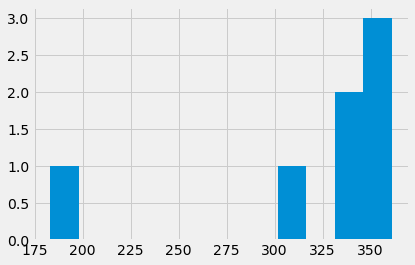

In [84]:
# Plot the results as a histogram with `bins=12`.

hist = count.hist(bins=12)